# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

<style>
    .black {
        background-color:#161616;
    }
</style>

<div class="black"> 
<h3>Antwoord 1: </h3>

 - year' is numerieke continue data. Met jaartallen kunnen wiskundige bewerkingen worden uitgevoerd, bovendien kan een jaartal elk mogelijk jaar zijn. 

 - fuel type' is categorische data van het niet ordinale type. Er is geen volgorde of hierarchische onderverdeling bij deze data, het is louter beschrijvend. 

 - seller_rating' is nummerieke discrete data. Het is een numerieke waarde gelimiteerd tussen 1 en 5. 

 <br>
 </div>

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 2:</h3>
In de code hieronder laad ik de csv file met alle 2de hands wagens in daarna filter ik op het merk Volvo. <br>
Dan bereken ik de mediaan prijs en zie ik welke wagen het dichts bij deze mediaan prijs aanleunt. <br>
Er zijn dan 50% auto's die meer en 50% auto's die minder kosten.  <br>
Deze auto beschouw ik als de gewoonlijke (mbt prijs) 2de handse Volvo. 

De beschrijving van deze auto vind je onder de volgende 2 cellen code.  <br> <br>
</div>

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_style 
import seaborn as sns
from scipy import stats

plot_style.standard_setup()


In [30]:
df = pd.read_csv("../../data/Cars/cars.csv")
# df.describe()

# Filter het DataFrame op Volvo
df_volvo = df[df['manufacturer'] == 'Volvo']

# Bereken de mediaan prijs van de Volvo's
median_price = round(df_volvo['price'].median())

print(f"De mediaan prijs van een Volvo is: {median_price}")

# De auto met de prijs van de mediaan prijs. /.iloc[0] om de eerste te nemen mochten er meerdere zijn. 

median_volvo = df_volvo[df_volvo['price'] == median_price].iloc[0].dropna()

print(f"\n \nDe Volvo met een mediaan tweedehands prijs ziet er als volgt uit: \n\n{median_volvo}")


De mediaan prijs van een Volvo is: 36673

 
De Volvo met een mediaan tweedehands prijs ziet er als volgt uit: 

manufacturer                               Volvo
model                              XC40 R-Design
year                                        2020
mileage                                  35989.0
engine                                   I-4 cyl
transmission           Automatic with Geartronic
drivetrain                                   AWD
fuel_type                               Gasoline
exterior_color               Onyx Black Metallic
interior_color                          Charcoal
accidents_or_damage                          0.0
one_owner                                    1.0
personal_use_only                            1.0
seller_name                    Borton Volvo Cars
seller_rating                                4.0
driver_rating                                4.9
driver_reviews_num                          50.0
price                                    36673.0
Name: 

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 3:</h3>

 - Visueel zou je verwachten dat het gemiddelde rond de 40.000 euro ligt. 
 - De Mediaan zou ik iets lager dan 40.000 euro verwachten. 
 - Na het plotten komt dit min of meer overeen, al ligt het gemiddelde iets lager dan verwacht
 - Zie de 2 cellen hieronder voor de plot van het histogram + gemiddelde en mediaan, en de plot van de emperische cummulatieve distributie functie met scipy.stats.ecdf berekend
 <br>
 <br>
 </div>

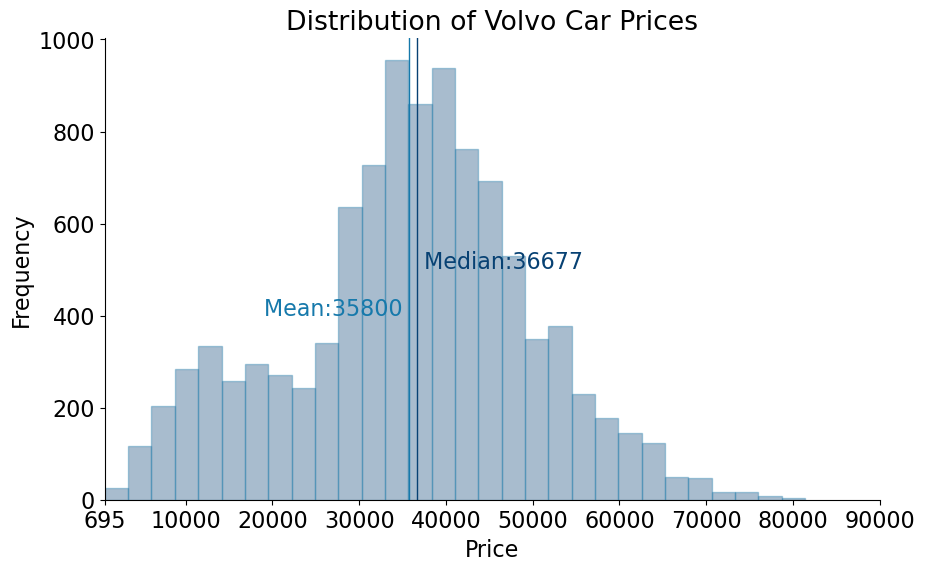

De prijsklasse van 2de hands Volvo-auto's in de dataset varieert van 695.0 tot 81400.0.


In [48]:
# load standard plot values and colors
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of Volvo cars with pre defined colors in plot_style.py
ax.hist(df_volvo['price'], bins=30,  color=plot_style.hist_color, edgecolor=plot_style.hist_edgecolor, alpha=0.35)

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color=plot_style.median_color,  linewidth=1, label=f'Median: {median_price}')
ax.axvline(mean_price, color=plot_style.mean_color, linewidth=1, label=f'Mean: {mean_price}')

# Add labels for the median and mean prices
ax.text((median_price), ax.get_ylim()[1]*0.5, f' Median:{round(median_price)}', color=plot_style.median_color, ha='left')
ax.text((mean_price), ax.get_ylim()[1]*0.4, f'Mean:{round(mean_price)} ', color=plot_style.mean_color, ha='right')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')


# Calculate the minimum and maximum prices
min_price = df_volvo['price'].min()
max_price = df_volvo['price'].max()

ax.set_xlim(min_price, max_price)
# Get the current x-ticks and append 650
xticks = ax.get_xticks().tolist()
xticks.append(min_price)
xticks.pop(0)
ax.set_xticks(xticks)

plt.show()

# Print the range of prices
print(f'De prijsklasse van 2de hands Volvo-auto\'s in de dataset varieert van {min_price} tot {max_price}.')

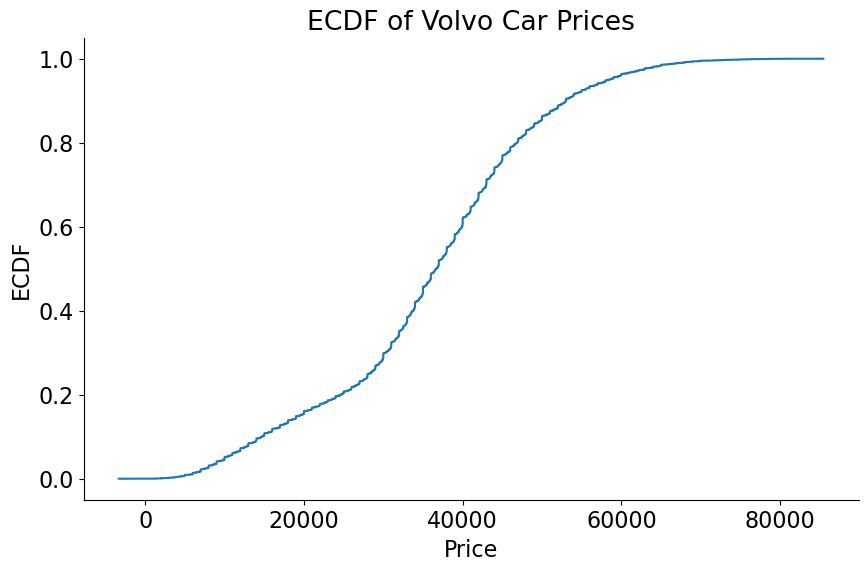

In [32]:
# Print Ecd met stats.ecdf

res = stats.ecdf(df_volvo['price'])

fig, ax = plt.subplots()
res.cdf.plot(ax)

ax.set_title('ECDF of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('ECDF')
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?


<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 4:</h3>
Om de grafiek duidelijker te maken heb ik aan de grafiek enkele standaard gedefinieerde kleuren, font groottes, labels toegevoegd.<br> Ik heb ook transparantie toegevoegd en de bin size verkleind zodat alles rond de gemiddelde prijs samenvalt in 1 bin. Zo tekent de piek zich duidelijker af.  

Als alternatief heb ik een boxplot met dezelfde kleuren geplot.<br>
Deze toont duidelijk de gemiddelde prijs van de 3 categorieen en de prijsrange waarbinnen de gasoline, hybrid en electrische wagens vallen. <br><br>
</div>

['Hybrid' 'Plug-In Hybrid' 'Gasoline' 'Gasoline Fuel' 'Premium Unleaded'
 'Gasoline/Mild Electric Hybrid' nan 'Regular Unleaded' 'Electric'
 'Hybrid Fuel' 'G' 'Plug-In Electric/Gas' 'Gas']


C:\Users\BartVrancken\AppData\Local\Temp\ipykernel_26408\2172189269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volvo.loc[:, 'fuel_type_3cat'] = df_volvo['fuel_type'].apply(lambda x: 'Electric' if x in electric else ('Hybrid' if x in hybrid else ('Gasoline' if x in gasoline else x)))


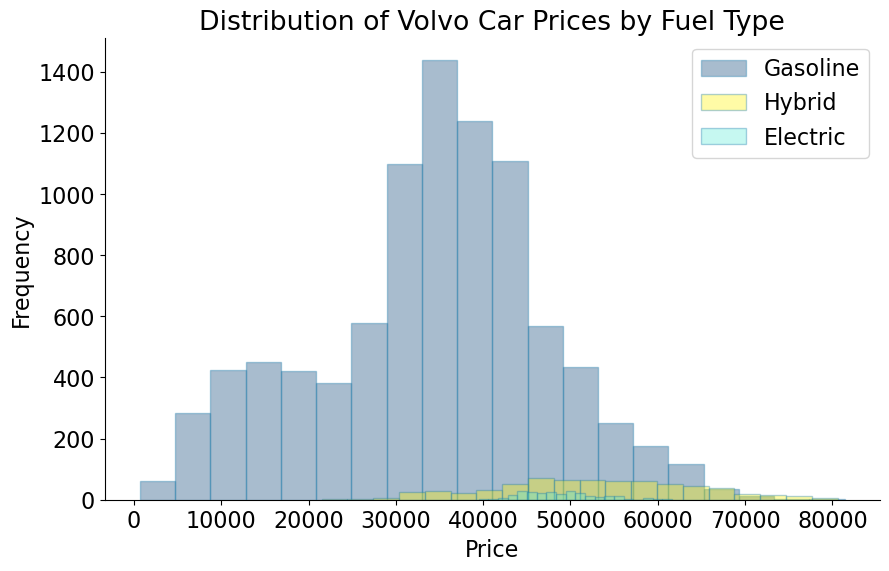

In [33]:
# Eerst kijken welke unieke values in fuel_type zitten, en deze dan toewijzen aan de 3 categorieen.
print(df_volvo['fuel_type'].unique())

# Define the categories
electric = ['Electric']
hybrid = ['Hybrid', 'Plugin Hybrid',"Plug-In Hybrid",'Gasoline/Mild Electric Hybrid', 'Hybrid Fuel', 'Plug-In Electric/Gas']
gasoline = ['Gasoline',"Gas", 'Gasoline Fuel', 'Premium Unleaded', 'Regular Unleaded', 'G']

# Add the 'fuel_type_3cat' column
df_volvo.loc[:, 'fuel_type_3cat'] = df_volvo['fuel_type'].apply(lambda x: 'Electric' if x in electric else ('Hybrid' if x in hybrid else ('Gasoline' if x in gasoline else x)))

# Remove rows with NaN in 'fuel_type_3cat' from df_volvo
df_volvo = df_volvo.dropna(subset=['fuel_type_3cat'])

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of gasoline Volvo cars with grey bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Gasoline']['price'], bins=20, color=plot_style.hist_color, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Gasoline')


# Plot a histogram of the prices of Hybrid Volvo cars with yellow bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Hybrid']['price'], bins=20, color=plot_style.hist_color3, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Hybrid')

# Plot a histogram of the prices of electric Volvo cars with green bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Electric']['price'], bins=20, color=plot_style.hist_color2, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Electric')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices by Fuel Type')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend()

# Display the plot
plt.show()

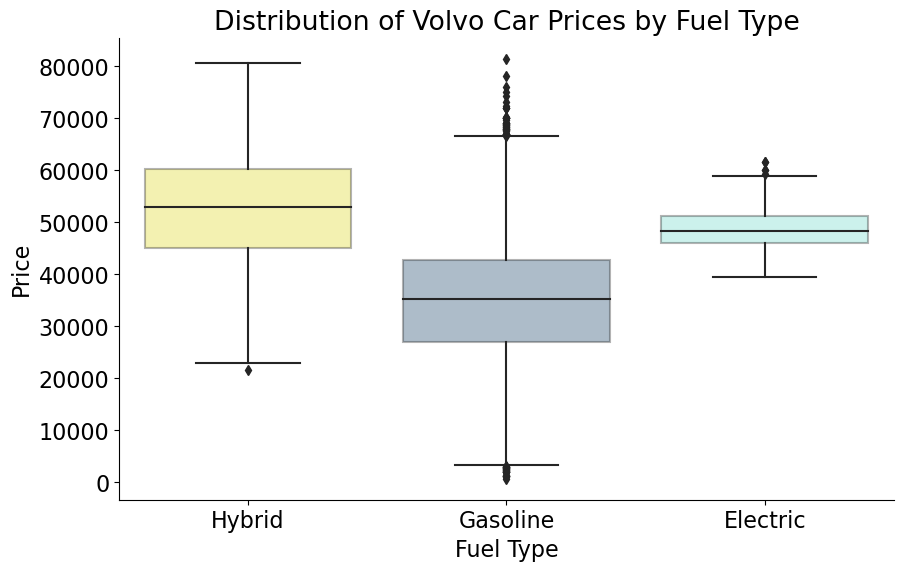

In [34]:
# Create a boxplot of the prices by fuel type
# Define a dictionary mapping fuel types to colors
# Define a dictionary mapping fuel types to colors
color_dict = {'Electric': plot_style.hist_color2, 'Hybrid': plot_style.hist_color3, 'Gasoline': plot_style.hist_color}

# Create a boxplot of the prices by fuel type
sns.boxplot(x='fuel_type_3cat', y='price', data=df_volvo, palette=color_dict,boxprops=dict(alpha=.35))


# Set the title and labels
plt.title('Distribution of Volvo Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# Display the plot
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:


 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 5:</h3>

- De spreiding op de prijs van elektrische wagens is zeker niet groter dan die van benzinewagens.  <br>Integendeel, de spreiding is veel kleiner. de box en wiskers zijn veel korter bij de electrische boxplot.

 - Dat is niet echt te besluiten. Indien er evenveel electrische als benzine tweedehands wagens zouden zijn dan kan je dat hieruit afleiden.  <br>Maar aangezien deze boxplot niets zegt over het aantal verkochte wagens kan je hieruit niet afleiden of de kans groter is dat een wagen die meer dan 50.000 kost electrisch is of bezine.  

 - ja, je kan besluiten dat een elektrische wagen een grotere kans heeft om meer dan 50 000 euro te kosten dan een benzine wagen. <br>De mediaan van de electrische wagens ligt op plus minus 50.000 euro. Dus meer dan de helft van de electrische wagens kost meer dan 50.000 euro. <br>Bij bezine wagens is  e mediaan slechts ongeveer 35.000 euro. en zien we dat zelfs minder dan 75% van de wagen meer dan 50.000 euro kost.  .
<br>
<br>
 </div>

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 6:</h3>
In de code en output hieronder zie je een scatter plot van het verband tussen mileage en prijs. <br>
Ik heb ook in deze scatter plot een opsplitsing gemaakt tussen de 3 categorien, benzine, hybrid en electrisch. <br>

Na de scatter plot heb ik met  scipy.optimize en curve_fit, deze scatter samengesmolten op een lijn, die duidelijker de trend weergeeft van alle plots samen.<br>
Hieruit wordt het nog duidelijker dat hoe lager de km stand hoe hoger de prijs. En dit zowel voor bezine, hybrid als electrisch. <br> <br>

</div>


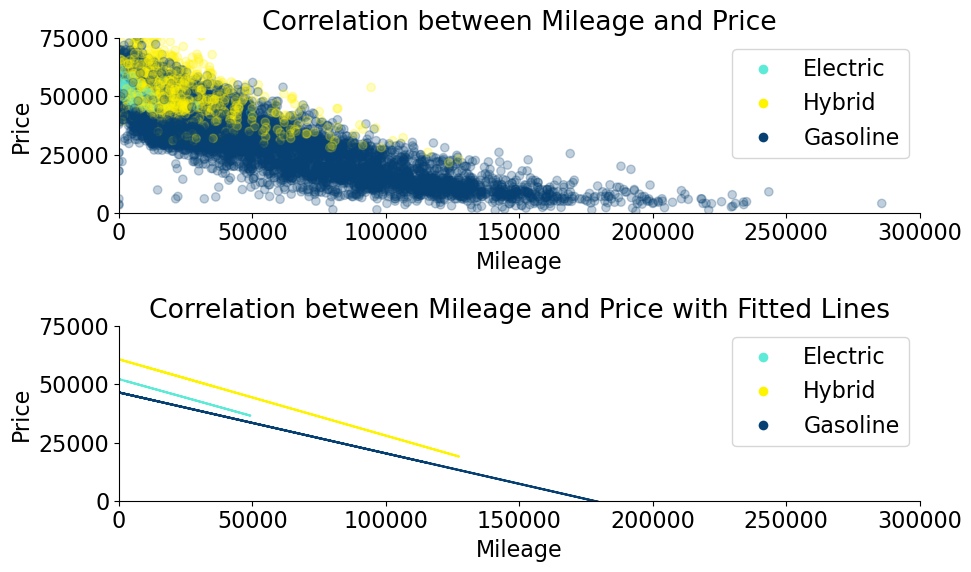

In [35]:
# Define a dictionary mapping fuel types to colors
color_dict = {'Electric': plot_style.hist_color2, 'Hybrid': plot_style.hist_color3, 'Gasoline': plot_style.hist_color}

fig, ax = plt.subplots(2, 1)

# First subplot without lines
colors = df_volvo['fuel_type_3cat'].map(color_dict)
ax[0].scatter(df_volvo['mileage'], df_volvo['price'], c=colors, alpha=0.25)
ax[0].set_title('Correlation between Mileage and Price')
ax[0].set_xlabel('Mileage')
ax[0].set_ylabel('Price')
ax[0].ticklabel_format(style='plain', axis='x')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()]
ax[0].legend(handles, color_dict.keys())
ax[0].set_xlim(df_volvo['mileage'].clip(0, 300000).min(), df_volvo['mileage'].clip(0, 300000).max())
ax[0].set_ylim(0, 75000)



from scipy.optimize import curve_fit

def model(x, m, b):
    return m * x + b

# Second subplot with lines
for fuel_type, color in color_dict.items():
    df_fuel_type = df_volvo[df_volvo['fuel_type_3cat'] == fuel_type]
    df_fuel_type = df_fuel_type[np.isfinite(df_fuel_type['mileage']) & np.isfinite(df_fuel_type['price'])]
    popt, pcov = curve_fit(model, df_fuel_type['mileage'], df_fuel_type['price'])
    ax[1].plot(df_fuel_type['mileage'], model(df_fuel_type['mileage'], *popt), color=color)
ax[1].set_title('Correlation between Mileage and Price with Fitted Lines')
ax[1].set_xlabel('Mileage')
ax[1].set_ylabel('Price')
ax[1].ticklabel_format(style='plain', axis='x')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()]
ax[1].legend(handles, color_dict.keys())
ax[1].set_xlim(df_volvo['mileage'].clip(0, 300000).min(), df_volvo['mileage'].clip(0, 300000).max())
ax[1].set_ylim(0, 75000)

plt.tight_layout()
plt.show()

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

<style>
    .black {
        background-color: #161616;
    }
</style>

<div class="black"> 
<h3> Antwoord 7:</h3>

ik interpreteer de vraag als volgt:<br>
Is onze dataset van tweedehands electrische Volvo's representatief voor alle 2de hands elektrische Volo's. dus ook die buiten de dataset. <br>
En niet als is onze onze dataset van tweedehands electrische Volvo's representatief voor alle Volvo's (benzine, hybrid, electrisch) binnen onze dataset. <br> <br>

Als we veronderstellen dat de steekproef van tweedehands elektrische Volvo's representatief is voor alle tweedehands Volvo's, kunnen we de accuraatheid van de gemiddelde prijs schatten met behulp van een betrouwbaarheidsinterval.<br><br>

<i> Definitie: Een betrouwbaarheidsinterval geeft een reeks waarden weer, afgeleid van de steekproefgegevens, die waarschijnlijk het populatiegemiddelde bevat. De breedte van het betrouwbaarheidsinterval geeft ons een idee van hoe onzeker we zijn over de onbekende populatie. </i><br><br>

Ons betrouwbaarheids interval is op zich redelijk smal rond 48.000 (48273.06337589856, 49303.71923279709) dus we zijn redelijk zeker dat alle 2de hands electrische Volvo's in onze dataset representatief zijn voor alle 2de handse Volvo's in de wereld.

Voor de berekening zie de code hieronder<br><br>
</div>

In [36]:
# Filter the DataFrame to include only electric Volvos
df_electric = df_volvo[df_volvo['fuel_type_3cat'] == 'Electric']

# Calculate the sample mean and standard deviation
mean_electric = np.mean(df_electric['price'])
std_dev_electric = np.std(df_electric['price'], ddof=1)  # Use ddof=1 to get the sample standard deviation

# Calculate the standard error
std_err_electric = std_dev_electric / np.sqrt(len(df_electric))

# Calculate the 95% confidence interval
confidence_interval_electric = stats.t.interval(0.95, len(df_electric) - 1, loc=mean_electric, scale=std_err_electric)

print(f"Het 95% betrouwbaarheidsinterval voor de gemiddelde prijs van alle tweedehands Volvos is, gebaseerd op het sample van electrische Volvo's, is {confidence_interval_electric}")



Het 95% betrouwbaarheidsinterval voor de gemiddelde prijs van alle tweedehands Volvos is, gebaseerd op het sample van electrische Volvo's, is (48273.06337589856, 49303.71923279709)


<style>
    .black {
        background-color:#161616;
    }
</style>

<div class="black"> 
<br>
Ik heb nog even wat extra opgezocht om te checken of onze dataset van tweedehands electrische Volvo's representatief is voor alle Volvo's (benzine, hybrid, electrisch) binnen onze dataset.<br> <br>
Daarvoor heb ik ook het betrouwbaarheidsinterval van alle Volvo's binnen onze dataset berekent (35526.87424353326, 36073.522280637735) en je ziet direct dat beide betrouwbaarheidsintervallen niet binnen elkaar liggen. <br> <br>

En ik heb nog een t-toets hypotese test voor de twee datasets uitgevoerd en P is 5.4 Dit zou kleiner moeten zijn als 0.05 om significant te zijn.<br>
Dus dan kunnen we met zekerheid wel besluiten dat onze gemiddelde prijs van tweedehands electrische Volvo's niet representatief is voor alle Volvo's (benzine, hybrid, electrisch) binnen onze dataset <br><br>
</div>

In [37]:
#  Calculate the sample mean and standard deviation for all Volvos
mean_all = np.mean(df_volvo['price'])
std_dev_all = np.std(df_volvo['price'], ddof=1)  # Use ddof=1 to get the sample standard deviation

# Calculate the standard error
std_err_all = std_dev_all / np.sqrt(len(df_volvo))

# Calculate the 95% confidence interval
confidence_interval_all = stats.t.interval(0.95, len(df_volvo) - 1, loc=mean_all, scale=std_err_all)

print(f"Het 95% betrouwbaarheidsinterval voor de gemiddelde prijs van alle tweedehands Volvo's is {confidence_interval_all}")

# Uitvoeren van een t-toets voor twee steekproeven
t_statistic, p_value = stats.ttest_ind(df_volvo['price'], df_electric['price'])

# Print resultaten
print("T-Statistiek:", t_statistic)
print("P-waarde:", p_value)

# Interpreteren van de p-waarde
alpha = 0.05  # Significantieniveau
if p_value < alpha:
    print("De gemiddelde prijs van elektrische Volvo's verschilt significant van de gemiddelde prijs van alle Volvo's binnen onze dataset.")
else:
    print("Er is geen significant verschil gevonden tussen de gemiddelde prijs van elektrische Volvo's en de gemiddelde prijs van alle Volvo's binnen onze dataset.")

Het 95% betrouwbaarheidsinterval voor de gemiddelde prijs van alle tweedehands Volvo's is (35526.87424353326, 36073.522280637735)
T-Statistiek: -14.789887817553286
P-waarde: 5.429126879977186e-49
De gemiddelde prijs van elektrische Volvo's verschilt significant van de gemiddelde prijs van alle Volvo's binnen onze dataset.
